# Using Julia for descriptive statistics

In [4]:
using Distributions # create random variables
using StatsBase # basic statistical support
using CSV # reading and writing csv files
using DataFrames # create a data structure
using HypothesisTests # perform statistical tests
using StatsPlots 
using GLM # general linear models
pyplot()

Plots.PyPlotBackend()

## Creating random variable

In [5]:
age = rand(18:80, 100);
wcc = round.(rand(Distributions.Normal(12, 2), 100), digits=1)
crp = round.(Int, rand(Distributions.Chisq(4), 100)) .*10
treatment = rand(["A", "B"], 100);
result = rand(["Improved", "Static", "Worse"], 100);

## Descriptive statistics

In [12]:
mean(age)

48.87

In [14]:
median(age)

47.5

In [16]:
std(age)

18.182384082102406

In [17]:
var(age)

330.59909090909093

In [15]:
StatsBase.describe(age)

Summary Stats:
Length:         100
Missing Count:  0
Mean:           48.870000
Minimum:        18.000000
1st Quartile:   33.750000
Median:         47.500000
3rd Quartile:   64.250000
Maximum:        80.000000
Type:           Int64


In [18]:
mean(wcc)

11.843000000000002

In [19]:
std(wcc)

1.9314125777405888

In [20]:
StatsBase.summarystats(wcc) # don't show the type

Summary Stats:
Length:         100
Missing Count:  0
Mean:           11.843000
Minimum:        6.500000
1st Quartile:   10.550000
Median:         11.800000
3rd Quartile:   13.175000
Maximum:        17.000000


## Creating a dataframe

In [21]:
data = DataFrame(Age = age, WCC=wcc, CRP=crp, Treatment=treatment, Result=result)

,Age,WCC,CRP,Treatment,Result
,Int64,Float64,Int64,String,String
1,29,16.0,100,B,Improved
2,67,11.8,0,A,Static
3,60,15.5,70,B,Worse
4,56,8.1,10,B,Static
5,54,9.4,30,A,Worse
6,75,13.0,30,A,Static
7,71,11.6,30,B,Static
8,34,9.9,20,B,Static
9,79,12.2,40,B,Static


In [22]:
size(data)

(100, 5)

In [23]:
head(data)

,Age,WCC,CRP,Treatment,Result
,Int64,Float64,Int64,String,String
1,29,16.0,100,B,Improved
2,67,11.8,0,A,Static
3,60,15.5,70,B,Worse
4,56,8.1,10,B,Static
5,54,9.4,30,A,Worse
6,75,13.0,30,A,Static


In [24]:
# Select only patient in treatment of group A
dataA = data[data[:Treatment] .== "A", :]

,Age,WCC,CRP,Treatment,Result
,Int64,Float64,Int64,String,String
1,67,11.8,0,A,Static
2,54,9.4,30,A,Worse
3,75,13.0,30,A,Static
4,25,14.6,20,A,Worse
5,66,9.7,30,A,Worse
6,77,11.1,30,A,Improved
7,43,14.3,20,A,Worse
8,33,11.4,10,A,Improved
9,57,10.1,50,A,Static


In [25]:
# Select only patients in treatment of group B
dataB = data[data[:Treatment] .== "B", :]

,Age,WCC,CRP,Treatment,Result
,Int64,Float64,Int64,String,String
1,29,16.0,100,B,Improved
2,60,15.5,70,B,Worse
3,56,8.1,10,B,Static
4,71,11.6,30,B,Static
5,34,9.9,20,B,Static
6,79,12.2,40,B,Static
7,50,11.9,50,B,Static
8,80,13.4,50,B,Static
9,29,13.0,20,B,Worse


## Descriptive statistics using dataframe object

In [26]:
describe(data)

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Union…,Nothing,DataType
1,Age,48.87,18,47.5,80,,,Int64
2,WCC,11.843,6.5,11.8,17.0,,,Float64
3,CRP,43.0,0,30.0,160,,,Int64
4,Treatment,,A,,B,2,,String
5,Result,,Improved,,Worse,3,,String


In [27]:
# We can count the number of patients in groups A and B
by(data, :Treatment, df -> DataFrame(N=size(df, 1)))

,Treatment,N
,String,Int64
1,B,58
2,A,42


In [28]:
by(data, :Treatment, size)

,Treatment,x1
,String,Tuple…
1,B,"(58, 5)"
2,A,"(42, 5)"


In [30]:
# The descriptive statistics of a numerical variable can be calculated after separation by categorical variable
by(data, :Treatment, df -> mean(df.Age))

,Treatment,x1
,String,Float64
1,B,45.1207
2,A,54.0476


In [31]:
by(data, :Treatment, df -> std(df.Age))

,Treatment,x1
,String,Float64
1,B,18.1476
2,A,17.1193


In [32]:
by(data, :Treatment, df -> describe(df.Age))

Summary Stats:
Length:         58
Missing Count:  0
Mean:           45.120690
Minimum:        18.000000
1st Quartile:   29.250000
Median:         40.500000
3rd Quartile:   60.000000
Maximum:        80.000000
Type:           Int64
Summary Stats:
Length:         42
Missing Count:  0
Mean:           54.047619
Minimum:        18.000000
1st Quartile:   39.250000
Median:         56.500000
3rd Quartile:   67.000000
Maximum:        78.000000
Type:           Int64


,Treatment,x1
,String,Nothing
1,B,
2,A,


## Visualizing the data

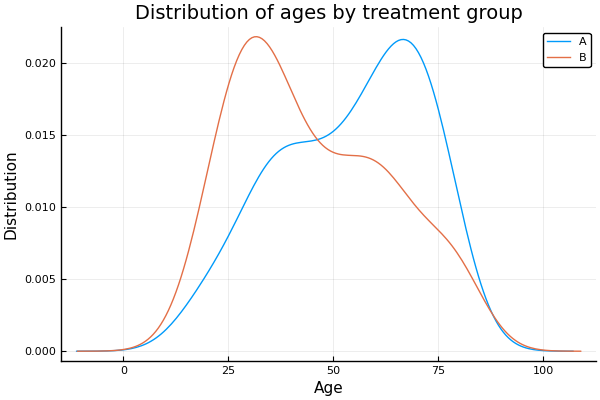

In [35]:
@df data density(:Age, group=:Treatment, title="Distribution of ages by treatment group",
xlab="Age", ylab="Distribution", legend=:topright)

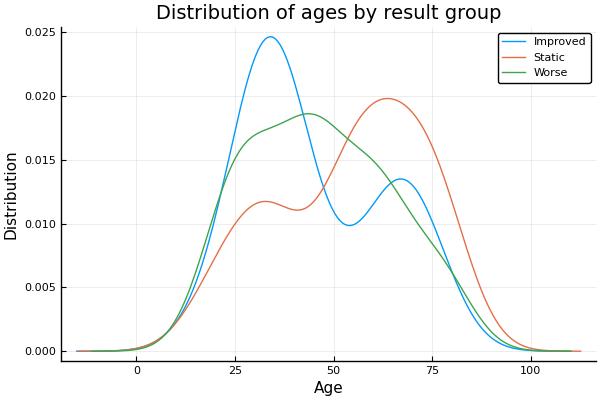

In [36]:
@df data density(:Age, group=:Result, title="Distribution of ages by result group",
xlab="Age", ylab="Distribution",
legend=:topright)

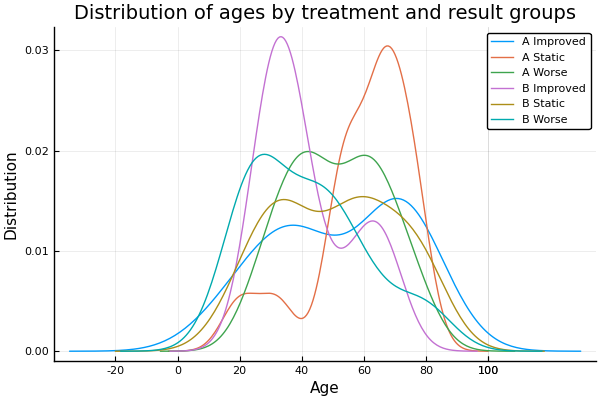

In [37]:
@df data density(:Age, group=(:Treatment, :Result), title="Distribution of ages by treatment and result groups",
xlab="Age", ylab="Distribution", legend=:topright)

┌ Warning: Keyword argument hover not supported with Plots.PyPlotBackend().  Choose from: Set([:zforeground_color_guide, :top_margin, :group, :background_color, :stride, :yforeground_color_text, :yguidefontcolor, :seriesalpha, :legendfontcolor, :seriescolor, :ztick_direction, :zlims, :overwrite_figure, :normalize, :linestyle, :xflip, :yforeground_color_guide, :fillcolor, :ygrid, :background_color_inside, :bins, :yscale, :clims, :xtickfontcolor, :xguide, :fillalpha, :tick_direction, :yguidefontsize, :legendfontfamily, :foreground_color, :x, :legend, :discrete_values, :ytick_direction, :ribbon, :xdiscrete_values, :legendtitle, :xgridstyle, :orientation, :gridstyle, :markersize, :camera, :xforeground_color_grid, :quiver, :zticks, :markerstrokecolor, :xtickfontsize, :levels, :zgridstyle, :foreground_color_border, :marker_z, :markerstrokealpha, :markeralpha, :zguidefontcolor, :ygridlinewidth, :zlink, :zscale, :smooth, :xticks, :zguidefontsize, :y, :margin, :ytickfontcolor, :title_location, 

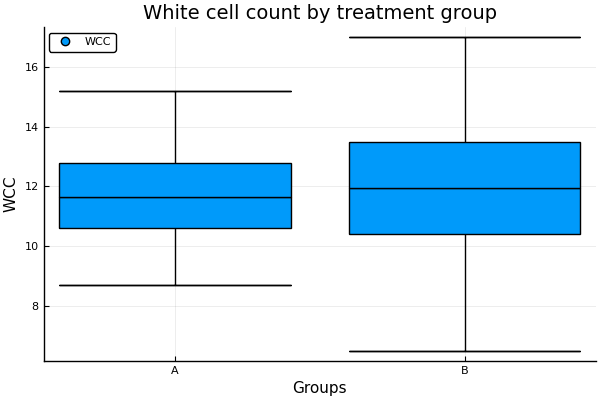

In [38]:
@df data boxplot(:Treatment, :WCC, lab="WCC", title="White cell count by treatment group",
xlab="Groups", ylab="WCC")

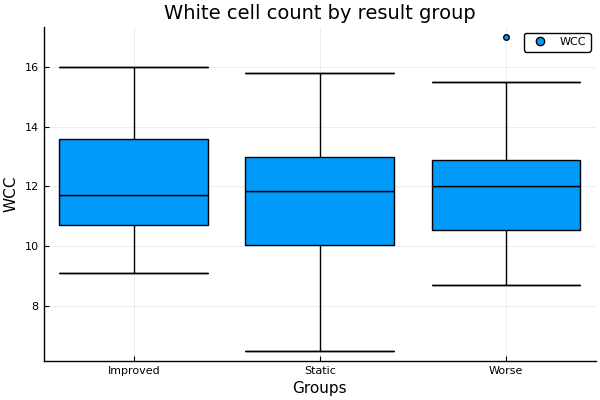

In [40]:
@df data boxplot(:Result, :WCC, lab="WCC", title="White cell count by result group",
xlab="Groups", ylab="WCC")

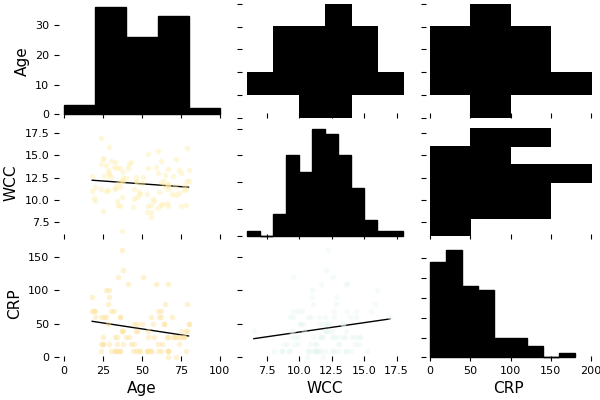

In [42]:
@df data corrplot([:Age :WCC :CRP], grid=false)

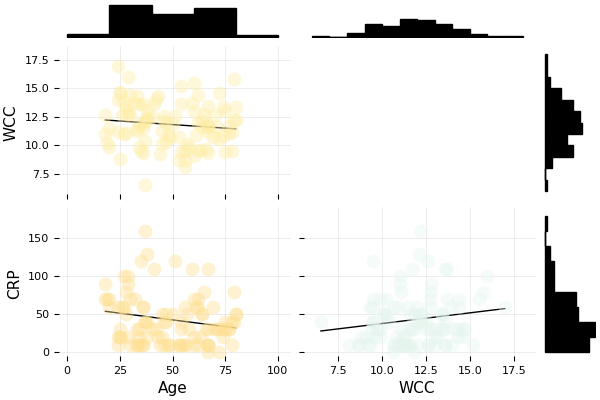

In [44]:
 @df data cornerplot([:Age :WCC :CRP], grid=false, compact=true)

## Inferential statistics

In [46]:
# Begin using Student's test to compare the mean of a numerical varible between two groups
# Difference in age between patients in group A and B
HypothesisTests.EqualVarianceTTest(dataA[:Age], dataB[:Age])

Two sample t-test (equal variance)
----------------------------------
Population details:
    parameter of interest:   Mean difference
    value under h_0:         0
    point estimate:          8.92693
    95% confidence interval: (1.8003, 16.0535)

Test summary:
    outcome with 95% confidence: reject h_0
    two-sided p-value:           0.0146

Details:
    number of observations:   [42,58]
    t-statistic:              2.485779590397212
    degrees of freedom:       98
    empirical standard error: 3.5911990857645475


In [48]:
# Only the p-value for the difference in white cell count between patients in groups A and B
pvalue(EqualVarianceTTest(dataA[:WCC], dataB[:WCC]))

0.5875549062136272

In [49]:
# Difference in c-reactive protein level between patients in groups A and B for unequal variances
UnequalVarianceTTest(dataA[:CRP], dataB[:CRP])

Two sample t-test (unequal variance)
------------------------------------
Population details:
    parameter of interest:   Mean difference
    value under h_0:         0
    point estimate:          -7.22496
    95% confidence interval: (-20.0065, 5.5566)

Test summary:
    outcome with 95% confidence: fail to reject h_0
    two-sided p-value:           0.2646

Details:
    number of observations:   [42,58]
    t-statistic:              -1.122030975175587
    degrees of freedom:       96.08722049641523
    empirical standard error: 6.439179585007664


- We can create a variety of linear models using the `GLM.fit()` function

In [51]:
# Simple model predicting CRP
fit(LinearModel, @formula(CRP ~ 1), data)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

CRP ~ 1

Coefficients:
─────────────────────────────────────────────────────────────────────
             Coef.  Std. Error      t  Pr(>|t|)  Lower 95%  Upper 95%
─────────────────────────────────────────────────────────────────────
(Intercept)   43.0     3.27679  13.12    <1e-22    36.4981    49.5019
─────────────────────────────────────────────────────────────────────

In [52]:
fit(LinearModel, @formula(CRP ~ Age), data)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

CRP ~ 1 + Age

Coefficients:
────────────────────────────────────────────────────────────────────────────
                 Coef.  Std. Error      t  Pr(>|t|)  Lower 95%     Upper 95%
────────────────────────────────────────────────────────────────────────────
(Intercept)  60.337       9.30109    6.49    <1e-8   41.8793    78.7948
Age          -0.354758    0.178486  -1.99    0.0496  -0.708958  -0.000559433
────────────────────────────────────────────────────────────────────────────

In [53]:
fit(LinearModel, @formula(CRP ~ Age + WCC), data)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

CRP ~ 1 + Age + WCC

Coefficients:
───────────────────────────────────────────────────────────────────────────
                 Coef.  Std. Error      t  Pr(>|t|)   Lower 95%   Upper 95%
───────────────────────────────────────────────────────────────────────────
(Intercept)  29.7623     22.9162     1.30    0.1971  -15.7199    75.2445
Age          -0.323741    0.178739  -1.81    0.0732   -0.678488   0.0310064
WCC           2.45368     1.68265    1.46    0.1480   -0.885926   5.79328
───────────────────────────────────────────────────────────────────────────

- We can conduct a $\chi^2$ test for independence using the `Hypothesis.ChisqTest()` function. First we need to look at the counts. Below we calculate the number of unique values for the Result variable sample space for patients in groups A and B.

In [54]:
by(dataA, :Result, df -> DataFrame(N=size(df, 1)))

,Result,N
,String,Int64
1,Static,14
2,Worse,20
3,Improved,8


In [55]:
by(dataB, :Result, df -> DataFrame(N=size(df, 1)))

,Result,N
,String,Int64
1,Improved,17
2,Worse,19
3,Static,22


In [60]:
# Enter the data in similar order
observed = reshape([22, 14, 20, 19, 8, 17], (2, 3))
observed

2×3 Array{Int64,2}:
 22  20   8
 14  19  17

In [61]:
ChisqTest(observed)

Pearson's Chi-square Test
-------------------------
Population details:
    parameter of interest:   Multinomial Probabilities
    value under h_0:         [0.18, 0.18, 0.195, 0.195, 0.125, 0.125]
    point estimate:          [0.22, 0.14, 0.2, 0.19, 0.08, 0.17]
    95% confidence interval: [(0.13, 0.3202), (0.05, 0.2402), (0.11, 0.3002), (0.1, 0.2902), (0.0, 0.1802), (0.08, 0.2702)]

Test summary:
    outcome with 95% confidence: fail to reject h_0
    one-sided p-value:           0.0803

Details:
    Sample size:        100
    statistic:          5.043418803418806
    degrees of freedom: 2
    residuals:          [0.942809, -0.942809, 0.113228, -0.113228, -1.27279, 1.27279]
    std. residuals:     [1.66667, -1.66667, 0.205023, -0.205023, -2.07846, 2.07846]


## Exporting CSV file

In [62]:
CSV.write("ProjectData_1_point_0.csv", data);

In [63]:
df = DataFrame(Group=rand(["A", "B"], 20), Variable1=randn(20), Variable2=rand(20))

size(df)

(20, 3)

In [64]:
df

,Group,Variable1,Variable2
,String,Float64,Float64
1,B,-0.661256,0.265538
2,B,0.111651,0.837895
3,A,0.197754,0.987195
4,A,1.35057,0.696815
5,A,-1.20899,0.496407
6,B,0.813047,0.324904
7,A,0.63103,0.0371343
8,B,0.997549,0.347612
9,A,-0.0790846,0.912776


In [69]:
view(df, 3, :)

,Group,Variable1,Variable2
,String,Float64,Float64
3,A,0.197754,0.987195


In [176]:
sample = rand(Normal(80, 10), 200)
std(sample)^2

83.70680693928246

In [147]:
sample2 = randn(100)
mean(sample2)

-0.011204487672880781

In [149]:
head(df)

,Group,Variable1,Variable2
,String,Float64,Float64
1,B,-0.661256,0.265538
2,B,0.111651,0.837895
3,A,0.197754,0.987195
4,A,1.35057,0.696815
5,A,-1.20899,0.496407
6,B,0.813047,0.324904


In [178]:
delete!(df, [2,4,6])

,Group,Variable1,Variable2
,String,Float64,Float64
1,B,-0.661256,0.265538
2,A,0.197754,0.987195
3,A,-1.20899,0.496407
4,A,0.63103,0.0371343
5,B,0.997549,0.347612
6,A,-0.0790846,0.912776
7,A,0.59579,0.0761212
8,B,0.915392,0.39461
9,A,0.268489,0.266043


In [179]:
Normal(80, 10)

Normal{Float64}(μ=80.0, σ=10.0)

In [180]:
randn(100)

100-element Array{Float64,1}:
 -0.45362817574953324
  0.7512209185549861
  1.0828477487254857
  1.0693877977584132
  1.1277270443879635
  1.5250087071784655
  0.2891189738305069
 -0.20234746237714335
  1.413858175894783
 -0.5523776644533129
  0.8127775289172362
 -0.9394905880688896
  1.0604679403882395
  ⋮
  1.0213558609981706
  0.4854549734268368
  0.012926878851332882
 -2.054123389002643
 -0.07964271986890913
  0.01648721573636691
 -1.097656869838905
  1.2751630229198014
 -1.1674763828340622
 -1.2542068982456054
  1.5548041413768352
  0.9133659035950644